# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
!pip install citipy


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
import sys
sys.path.append('c:\python311\lib\site-packages')
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | chengde
Processing Record 3 of Set 1 | pangody
Processing Record 4 of Set 1 | remire-montjoly
Processing Record 5 of Set 1 | nova vicosa
Processing Record 6 of Set 1 | yulinshi
Processing Record 7 of Set 1 | buenavista del norte
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | santiago de cao
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | tanabe
Processing Record 14 of Set 1 | yerofey pavlovich
Processing Record 15 of Set 1 | arno
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | kansk
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | kerman
Processing Record 20 of Set 1 | san jose del guaviare
Processing Record 21 of Set 1 | codrington
Processing Record 22 of

Processing Record 41 of Set 4 | port saint john's
Processing Record 42 of Set 4 | santa terezinha
Processing Record 43 of Set 4 | kigoma
Processing Record 44 of Set 4 | souillac
Processing Record 45 of Set 4 | lillehammer
Processing Record 46 of Set 4 | waingapu
Processing Record 47 of Set 4 | mangrol
Processing Record 48 of Set 4 | tessaoua
Processing Record 49 of Set 4 | hastings
Processing Record 0 of Set 5 | sao jose da coroa grande
Processing Record 1 of Set 5 | paidha
Processing Record 2 of Set 5 | galliano
Processing Record 3 of Set 5 | vorotynets
Processing Record 4 of Set 5 | kerikeri
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | eirunepe
Processing Record 7 of Set 5 | taro
Processing Record 8 of Set 5 | mount isa
Processing Record 9 of Set 5 | kenai
Processing Record 10 of Set 5 | rio turbio
City not found. Skipping...
Processing Record 11 of Set 5 | pyapon
Processing Record 12 of Set 5 | buala
Processing Record 13 of Set 5 | aasiaat
Processing Record 14

Processing Record 32 of Set 8 | tyukhtet
Processing Record 33 of Set 8 | mamuju
Processing Record 34 of Set 8 | lodwar
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | at taj
Processing Record 37 of Set 8 | tbeng meanchey
Processing Record 38 of Set 8 | mawlaik
Processing Record 39 of Set 8 | piti village
Processing Record 40 of Set 8 | winterswijk
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | howrah
Processing Record 43 of Set 8 | el bauga
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | tingi
Processing Record 46 of Set 8 | praya
Processing Record 47 of Set 8 | kil'mez'
City not found. Skipping...
Processing Record 48 of Set 8 | porto novo
Processing Record 49 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 0 of Set 9 | murzuq
Processing Record 1 of Set 9 | milazzo
Processing Record 2 of Set 9 | nikel
Processing Record 3 of Set 9 | hibbing
Processing Record 4 of Set 9 | pontalina
Processing Record 

Processing Record 20 of Set 12 | helena valley west central
Processing Record 21 of Set 12 | christchurch
Processing Record 22 of Set 12 | sadovoye
Processing Record 23 of Set 12 | palikir - national government center
Processing Record 24 of Set 12 | san mateo
Processing Record 25 of Set 12 | kill devil hills
Processing Record 26 of Set 12 | vilyuysk
Processing Record 27 of Set 12 | neryungri
Processing Record 28 of Set 12 | aweil
Processing Record 29 of Set 12 | enriquillo
Processing Record 30 of Set 12 | betio village
Processing Record 31 of Set 12 | digboi
Processing Record 32 of Set 12 | mena
Processing Record 33 of Set 12 | hami
Processing Record 34 of Set 12 | kadom
Processing Record 35 of Set 12 | serilingampalle
Processing Record 36 of Set 12 | saudarkrokur
Processing Record 37 of Set 12 | empalme
Processing Record 38 of Set 12 | ola
Processing Record 39 of Set 12 | buzim
Processing Record 40 of Set 12 | jikamshi
Processing Record 41 of Set 12 | mugia
Processing Record 42 of Se

In [46]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          596
Lat           596
Lng           596
Max Temp      596
Humidity      596
Cloudiness    596
Wind Speed    596
Country       596
Date          596
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,5.33,73,100,0.89,US,1705121803
1,chengde,40.9725,117.9361,-1.78,67,62,0.72,CN,1705121803
2,pangody,65.8500,74.4859,-39.77,100,86,1.61,RU,1705121803
3,remire-montjoly,4.9167,-52.2667,24.02,94,75,0.51,GF,1705121803
4,nova vicosa,-17.8919,-39.3719,24.96,85,6,4.82,BR,1705121804


In [48]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [49]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.33,73,100,0.89,US,1705121803
1,chengde,40.9725,117.9361,-1.78,67,62,0.72,CN,1705121803
2,pangody,65.8500,74.4859,-39.77,100,86,1.61,RU,1705121803
3,remire-montjoly,4.9167,-52.2667,24.02,94,75,0.51,GF,1705121803
4,nova vicosa,-17.8919,-39.3719,24.96,85,6,4.82,BR,1705121804


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

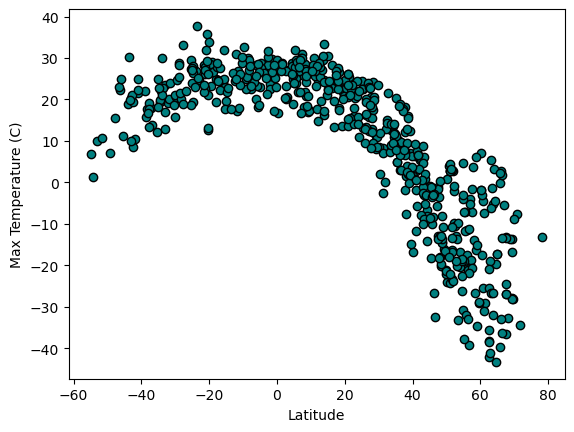

In [50]:
# Build scatter plot for latitude vs. temperature
x = [float(city["Lat"])for city in city_data]
y = [float(city["Max Temp"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

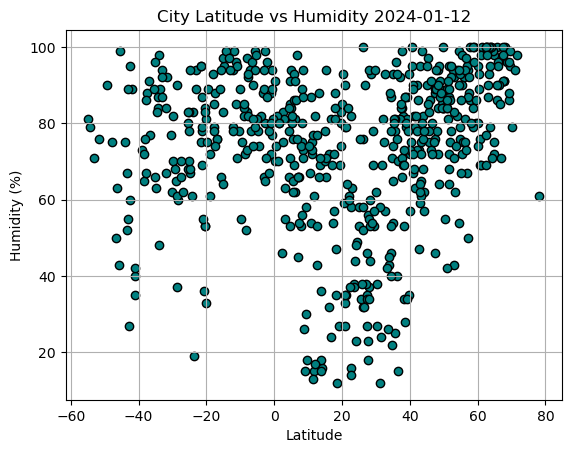

In [65]:
# Build the scatter plots for latitude vs. humidity
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Humidity"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Humidity {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

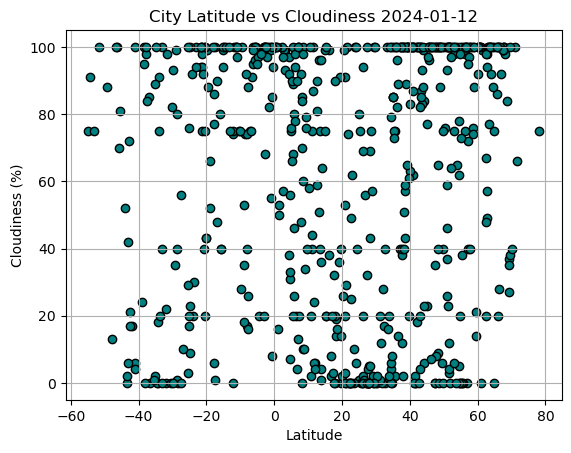

In [66]:
# Build the scatter plots for latitude vs. cloudiness
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Cloudiness"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Cloudiness {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

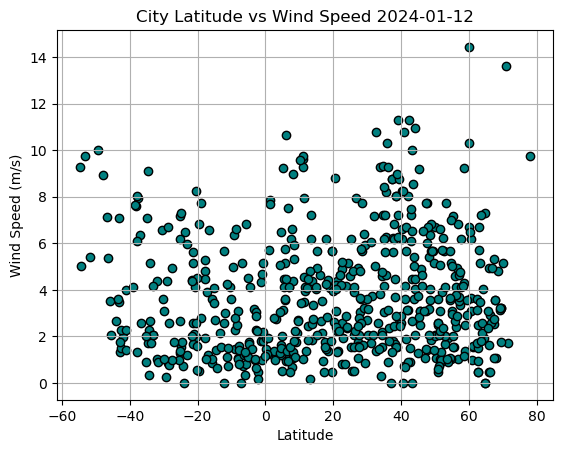

In [67]:
# Build the scatter plots for latitude vs. wind speed
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Wind Speed"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Wind Speed {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [68]:
# Define a function to create Linear Regression plots
from scipy import stats

def Create_Linear_regression_plot(x, y, x_label, y_label, i, j):
    x = np.array(x)
    y = np.array(y)
    
    # Perform linear regression using scipy's linregress
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Calculate the regression line
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))    
    
    # Create a scatter plot of the data points
    plt.scatter(x, y, label="Data Points", color="teal")
    
    # Plot the regression line
    plt.plot(x, regress_values, label="Linear Regression", color="red")
    
    # Customize plot labels and title
    plt.xlabel(x_label if x_label else "X-axis")
    plt.ylabel(y_label if y_label else "Y-axis")
    
    plt.annotate(line_eq, (i, j), fontsize=15, color="r")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [69]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_data=[]

for k, city in enumerate(city_data):
    city_lat = float(city["Lat"])
    if city_lat >= 0:
        north_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"],
            "City_ID": k 
        })
        
# Create a DataFrame
north_df=pd.DataFrame(north_data)

#set "City_ID" as the index column
north_df.set_index("City_ID", inplace=True)

#filter the DataFrame for the Northern Hemisphere
north_hemi_df = north_df[north_df["Lat"] >= 0]

# Display
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,5.33,73.0,100.0,0.89,US,1705121803
1,chengde,40.9725,117.9361,-1.78,67.0,62.0,0.72,CN,1705121803
2,pangody,65.8500,74.4859,-39.77,100.0,86.0,1.61,RU,1705121803
3,remire-montjoly,4.9167,-52.2667,24.02,94.0,75.0,0.51,GF,1705121803
5,yulinshi,38.2906,109.7494,3.98,34.0,51.0,3.70,CN,1705121804


In [70]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_data=[]

for k, city in enumerate(city_data):
    city_lat = float(city["Lat"])
    if city_lat < 0:
        south_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"],
            "City_ID": k 
        })
        
# Create a DataFrame
south_df=pd.DataFrame(south_data)

# Set "City_ID" as the index column
south_df.set_index("City_ID", inplace=True)

# Filter the DataFrame for the Southern Hemisphere
south_hemi_df = south_df[south_df["Lat"] < 0]

# Display sample data for the Southern Hemisphere
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,nova vicosa,-17.8919,-39.3719,24.96,85.0,6.0,4.82,BR,1705121804
7,edinburgh of the seven seas,-37.0676,-12.3116,17.91,91.0,85.0,6.36,SH,1705121804
10,santiago de cao,-7.9589,-79.2392,23.07,83.0,40.0,3.09,PE,1705121806
15,invercargill,-46.4000,168.3500,22.23,63.0,100.0,5.36,NZ,1705121577
17,ushuaia,-54.8000,-68.3000,6.81,81.0,75.0,9.26,AR,1705121655


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7611553456077039


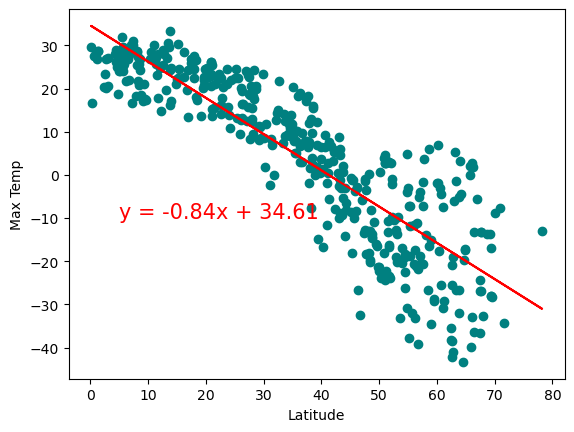

In [71]:
# Linear regression on Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [temp["Max Temp"] for temp in north_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = 5
j = -10
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.29126997922653014


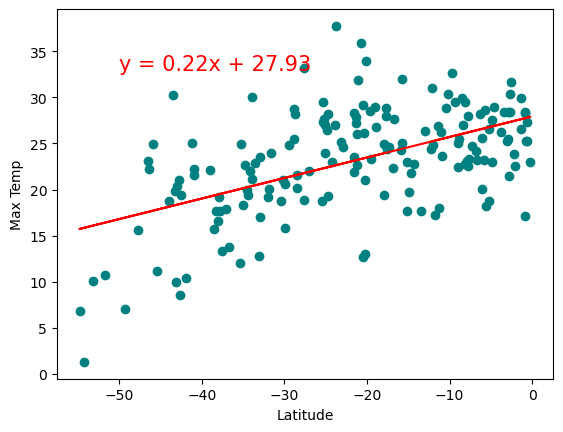

In [72]:
# Linear regression on Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [temp["Max Temp"] for temp in south_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = -50
j = 33
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** 
When conducting the linear regression we can see that latitude indeed has an affect on temperature. Our linear regression for the northern hemisphere had a R-value of 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17760236749875744


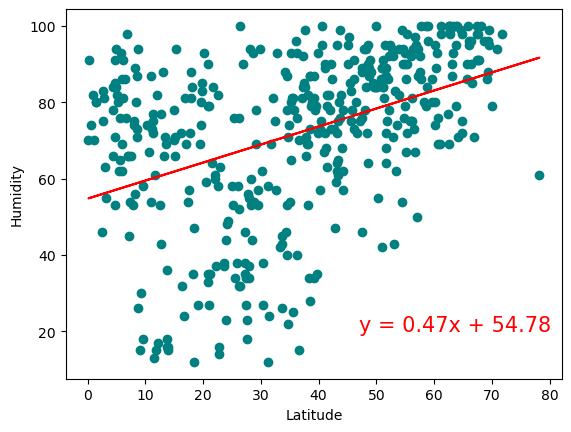

In [73]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [humidity["Humidity"] for humidity in north_data]
x_lable ="Latitude"
y_lable="Humidity"
i = 47
j = 20
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.08407680760769176


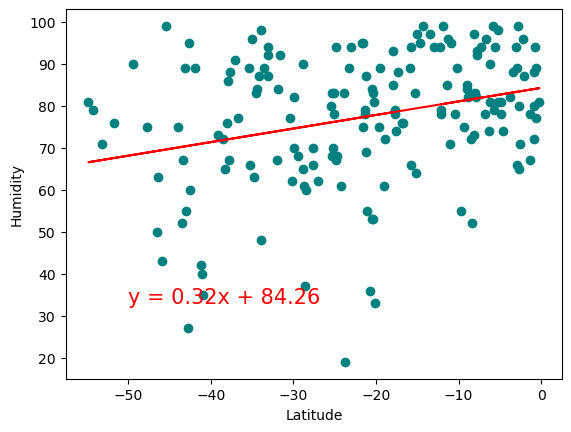

In [74]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [humidity["Humidity"] for humidity in south_data]
x_lable ="Latitude"
y_lable="Humidity"
i = -50
j = 33
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.047681507326660814


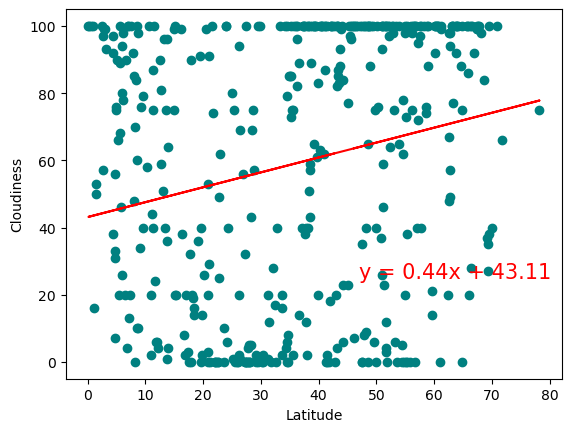

In [75]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [cloudiness["Cloudiness"] for cloudiness in north_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = 47
j = 25
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.08877986089786878


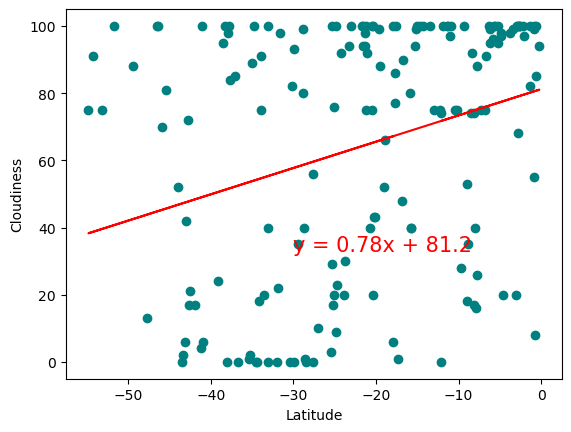

In [76]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [cloudiness["Cloudiness"] for cloudiness in south_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = -30
j = 33
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0008545703864904205


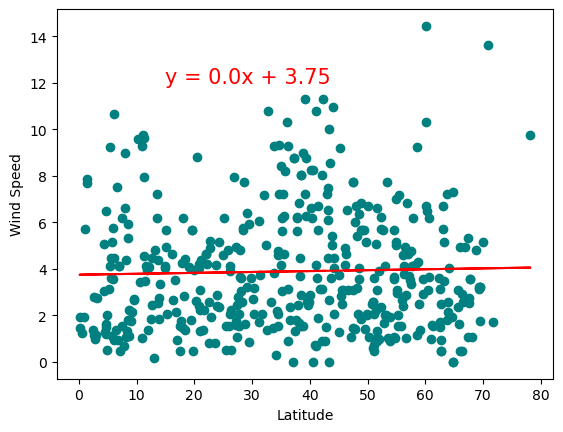

In [77]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in north_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = 15
j = 12
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.12949593402246112


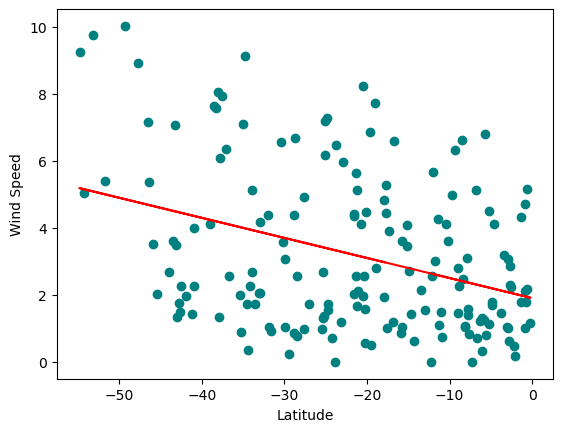

In [78]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in south_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = -35
j = 12
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** YOUR RESPONSE HERE